In [1139]:
import pandas as pd
import numpy as np
import requests # library to handle requests
import random # library for random number generation
import folium
from IPython.display import Image
from IPython.core.display import HTML
from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

How prevalent are hate crimes in New York City? Which groups are most affected and where are hate crimes most likely to occur? To help answer these questions, this analysis will:

1. Define what a hate crime is and why it matters
2. Source available hate crime data for New York City
3. Explore the data to uncover insights and trends
4. Discuss the results of the analysis



### What is a Hate Crime?


#### According to the New York State Anti-Hate Crime Resource Guide:

>"A hate crime is a traditional offense that is motivated by bias. A person commits a hate crime when one of a specified set of crimes is committed targeting a victim because of a perception or belief about their race, color, national origin, ancestry, gender, religion, religious practice, age, disability or sexual orientation, or when such an act is committed as a result of that type of perception or belief. These crimes can target an individual, a group of individuals or public or private property. Hate crimes can be perpetrated against an individual, a group, or against public or private property. For example, hanging a noose or painting a swastika could be deemed hate crimes."


Since this is New York City centric data, a definition of hate crime as determined by the New York Police Department (NYPD) is included below: 

>"The New York City Police Department uses the following guideline to identify hate crime and bias incidents: "A bias incident is any offense or unlawful act that is motivated in whole or substantial part by a person's, a group's or a place's identification with a particular race, color, religion, ethnicity, gender, age, disability, ancestry, national origin, or sexual orientation (including gay, lesbian, bi-sexual, and transgender) as determined by the commanding officer of the Hate Crime Task Force."

>Hate crimes may have consequences far beyond the criminal act itself. Becoming the victim of a crime is traumatic, but if the act was committed because of who you are or what you believe, the violation is even more hurtful and may cause deep emotional impacts."

### Why is it important?

#### According to the American Psychological Association

>"People victimized by violent hate crimes are more likely to experience more psychological distress than victims of other violent crimes.ii Specifically, victims of crimes that are bias-motivated are more likely to experience post-traumatic stress, safety concerns, depression, anxiety and anger than victims of crimes that are not motivated by bias."

>"Hate crimes send messages to members of the victim’s group that they are unwelcome and unsafe in the community, victimizing the entire group and decreasing feelings of safety and security.Furthermore, witnessing discrimination against one’s own group can lead to psychological distress and lower self-esteem."


# Sourcing the Data

In [1140]:
hc = pd.read_csv('.../Hate_Crimes_by_County_and_Bias_Type__Beginning_2010.csv')
hc.head(3)

,County,Year,Crime Type,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Identity Expression,Anti-Age*,Anti-White,Anti-Black,...,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
0,Albany,2018,Crimes Against Persons,0,0,0,0,0,1,3,...,3,1,1,0,0,0,0,12,12,12
1,Albany,2018,Property Crimes,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,5,3
2,Allegany,2018,Property Crimes,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1


### Cleaning the data 

#### The analysis will only keep the Counties (boroughs) that make up New York City

New York City is comprised of five counties or boroughs: Manhattan A.K.A. "New York", Kings A.K.A. "Brooklyn", Queens, the Bronx, and Richmond A.K.A. "Staten Island"

In [1141]:

#Filter the DataFrame by each of the five counties that make up New York City to remove statewide data
nyc_manhattan = hc[hc['County']=='New York']
nyc_richmond = hc[hc['County']=='Richmond']
nyc_kings = hc[hc['County']=='Kings']
nyc_bronx = hc[hc['County']=='Bronx']
nyc_queens = hc[hc['County']=='Queens']

#Combine the New York City county specific DataFrames to bring together each country that comprises the New York City

nyc_raw = [nyc_manhattan, nyc_richmond, nyc_kings, nyc_bronx, nyc_queens] #Create a list of dataframes

nyc_all_hate = pd.concat(nyc_raw) #Concatenate the dataframes in the list

In [1142]:
#Confirm that the filtered dataset only has the five boroughs of New York City
nyc_all_hate.groupby('County').sum()

,Year,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Identity Expression,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,Anti-Asian,...,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
County,,,,,,,,,,,,,,,,,,,,,
Bronx,36252,0,0,2,8,0,12,32,0,1,...,57,11,1,0,0,0,0,234,239,286
Kings,36252,0,0,0,12,1,30,79,0,10,...,176,26,1,0,0,0,0,1146,1185,1353
New York,36252,1,1,5,11,0,29,84,0,31,...,217,25,9,0,0,1,0,900,932,1046
Queens,36252,0,0,1,5,6,8,40,2,12,...,68,11,2,0,0,1,0,479,487,555
Richmond,36252,0,0,0,2,0,8,22,0,1,...,18,1,1,0,1,1,0,183,188,243


### Exploring the data and doing some more cleaning...

In [1143]:
#Get the dimensions of the dataset and make sure that all of the data types are of the correct type
nyc_all_hate.shape

(90, 44)

In [1144]:
nyc_all_hate.dtypes

County                                          object
Year                                             int64
Crime Type                                      object
Anti-Male                                        int64
Anti-Female                                      int64
Anti-Transgender                                 int64
Anti-Gender Identity Expression                  int64
Anti-Age*                                        int64
Anti-White                                       int64
Anti-Black                                       int64
Anti-American Indian/Alaskan Native              int64
Anti-Asian                                       int64
Anti-Native Hawaiian/Pacific Islander            int64
Anti-Multi-Racial Groups                         int64
Anti-Other Race                                  int64
Anti-Jewish                                      int64
Anti-Catholic                                    int64
Anti-Protestant                                  int64
Anti-Islam

In [1145]:
#Convert the "Year" into a String type
nyc_all_hate.Year = nyc_all_hate.Year.astype(str)

#### Finding the sum totals of each hate crime incident reported between 2010 and 2018

In [1146]:
nyc_all_hate.loc['Column_Total']= nyc_all_hate.sum(numeric_only=True, axis=0)

#See the totals for each incident type
nyc_all_hate.loc['Column_Total'].sort_values(ascending = False)

Total Offenders                                 3483
Total Victims                                   3031
Total Incidents                                 2942
Anti-Jewish                                     1306
Anti-Gay Male                                    536
Anti-Black                                       257
Anti-Islamic (Muslim)                            182
Anti-Other Ethnicity/National Origin             112
Anti-White                                        87
Anti-Hispanic                                     79
Anti-Gay Female                                   74
Anti-Catholic                                     73
Anti-Asian                                        55
Anti-Gender Identity Expression                   38
Anti-Other Religion                               30
Anti-Multi-Racial Groups                          24
Anti-Arab                                         23
Anti-Multi-Religious Groups                       15
Anti-Gay (Male and Female)                    

### More cleaning...

#### Drop the hate crime types with column totals showing less than 30 incidents over the last 9 years


In [1147]:
nyc_all_hate.drop(columns =['Anti-Other Religion','Anti-Multi-Racial Groups','Anti-Multi-Religious Groups','Anti-Gay (Male and Female)','Anti-Transgender','Anti-Arab','Anti-Age*','Anti-Other Christian','Anti-Physical Disability','Anti-Protestant','Anti-American Indian/Alaskan Native','Anti-Religious Practice Generally','Anti-Hindu','Anti-Female','Anti-Male','Anti-Mormon','Anti-Bisexual','Anti-Other Race','Anti-Atheism/Agnosticism','Anti-Native Hawaiian/Pacific Islander','Anti-Eastern Orthodox (Greek, Russian, etc.)','Anti-Jehovahs Witness','Anti-Sikh','Anti-Non-Hispanic*','Anti-Heterosexual','Anti-Mental Disability','Anti-Buddhist','Total Offenders','Total Victims','Total Incidents'], inplace = True)
nyc_all_hate.head()

,County,Year,Crime Type,Anti-Gender Identity Expression,Anti-White,Anti-Black,Anti-Asian,Anti-Jewish,Anti-Catholic,Anti-Islamic (Muslim),Anti-Hispanic,Anti-Other Ethnicity/National Origin,Anti-Gay Male,Anti-Gay Female
22,New York,2018,Crimes Against Persons,3.0,4.0,10.0,2.0,10.0,0.0,4.0,2.0,4.0,11.0,0.0
23,New York,2018,Property Crimes,2.0,0.0,6.0,0.0,68.0,0.0,3.0,3.0,3.0,3.0,0.0
87,New York,2017,Crimes Against Persons,1.0,3.0,9.0,3.0,8.0,0.0,3.0,0.0,2.0,8.0,0.0
88,New York,2017,Property Crimes,0.0,1.0,5.0,0.0,50.0,1.0,0.0,0.0,3.0,2.0,0.0
155,New York,2016,Crimes Against Persons,5.0,5.0,6.0,3.0,9.0,0.0,3.0,1.0,1.0,35.0,8.0


#### Combine "Crimes Against Persons" and "Property Crimes" for each year to consolidate the data

In [1148]:
nyc_hate_by_year = pd.DataFrame(nyc_all_hate.groupby('Year').sum())
nyc_hate_by_year

,Anti-Gender Identity Expression,Anti-White,Anti-Black,Anti-Asian,Anti-Jewish,Anti-Catholic,Anti-Islamic (Muslim),Anti-Hispanic,Anti-Other Ethnicity/National Origin,Anti-Gay Male,Anti-Gay Female
Year,,,,,,,,,,,
2010,0.0,4.0,36.0,12.0,137.0,4.0,22.0,27.0,9.0,65.0,6.0
2011,0.0,4.0,22.0,2.0,104.0,5.0,15.0,0.0,7.0,53.0,9.0
2012,0.0,6.0,33.0,3.0,218.0,9.0,25.0,10.0,4.0,45.0,7.0
2013,0.0,12.0,21.0,7.0,119.0,13.0,17.0,7.0,10.0,91.0,9.0
2014,0.0,8.0,25.0,2.0,126.0,13.0,23.0,8.0,14.0,71.0,5.0
2015,0.0,10.0,27.0,10.0,123.0,8.0,21.0,10.0,13.0,66.0,13.0
2016,17.0,16.0,20.0,8.0,138.0,10.0,29.0,3.0,28.0,70.0,14.0
2017,11.0,9.0,34.0,6.0,149.0,7.0,14.0,7.0,15.0,39.0,6.0
2018,10.0,18.0,39.0,5.0,192.0,4.0,16.0,7.0,12.0,36.0,5.0


## Visualizing the Data to get further insights

In [1149]:
nyc_all_hate.loc['NYC_Total_Hate_Incidents']= nyc_all_hate.sum(numeric_only=True, axis=0)

In [1150]:
nyc_total = pd.DataFrame(nyc_all_hate.loc['NYC_Total_Hate_Incidents'].sort_values(ascending = True))

### Which hate crimes have been most prevalent in New York City in the last 9 years?

In [1151]:
nyc_total = nyc_total[0:11]
nyc_total

,NYC_Total_Hate_Incidents
Anti-Gender Identity Expression,76
Anti-Asian,110
Anti-Catholic,146
Anti-Gay Female,148
Anti-Hispanic,158
Anti-White,174
Anti-Other Ethnicity/National Origin,224
Anti-Islamic (Muslim),364
Anti-Black,514
Anti-Gay Male,1072


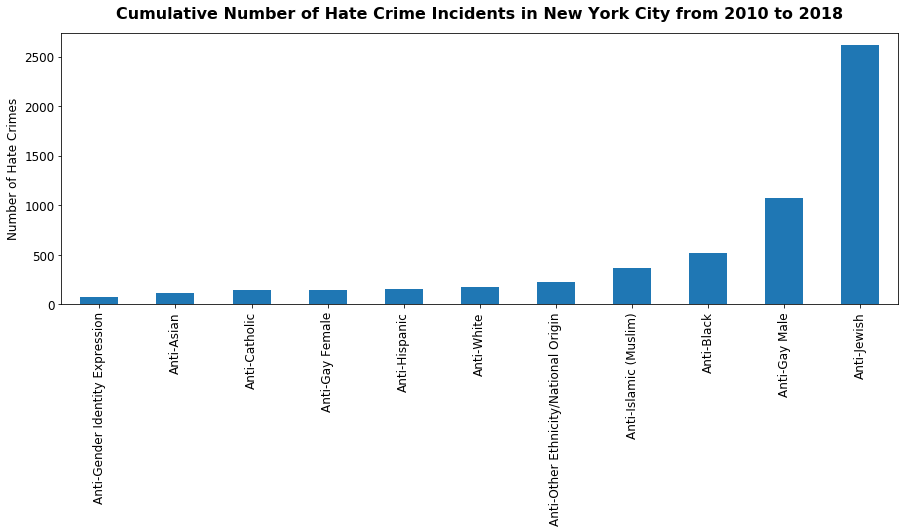

In [1152]:
nyc_total.plot.bar(figsize=(15,5), legend = False)

plt.title("Cumulative Number of Hate Crime Incidents in New York City from 2010 to 2018", fontsize = 16, y=1.03, fontweight='bold')
plt.ylabel("Number of Hate Crimes", fontsize = 12)
plt.tick_params(labelsize=12)

### Interpretation of the graph

The graph shows that the top five hate crimes incidents from 2010 to 2018 in NYC have been: Anti-National Origin, Anti-Islamic, Anti-Black, Anti-Gay Male, and Anti-Jewish. Have the number of hate crimes in those categories increased or decreased through the years? To answer this question, a breakdown of the number and nature of the incident types is required

### Breakdown the number of hate crime incidents year by year to see if there are any trends

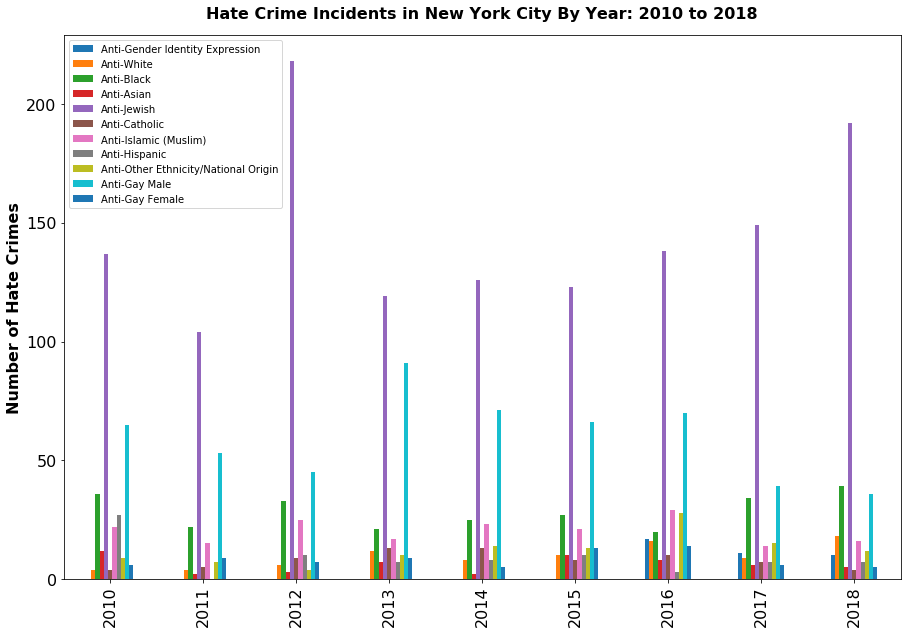

In [1153]:
nyc_hate_by_year.plot.bar(figsize=(15,10), legend = True)
plt.title("Hate Crime Incidents in New York City By Year: 2010 to 2018", fontsize = 16, y = 1.02, fontweight='bold')
plt.ylabel("Number of Hate Crimes", fontsize = 16, fontweight='bold')
plt.xlabel("")
plt.tick_params(labelsize=16)

### Alternative view of the yearly data

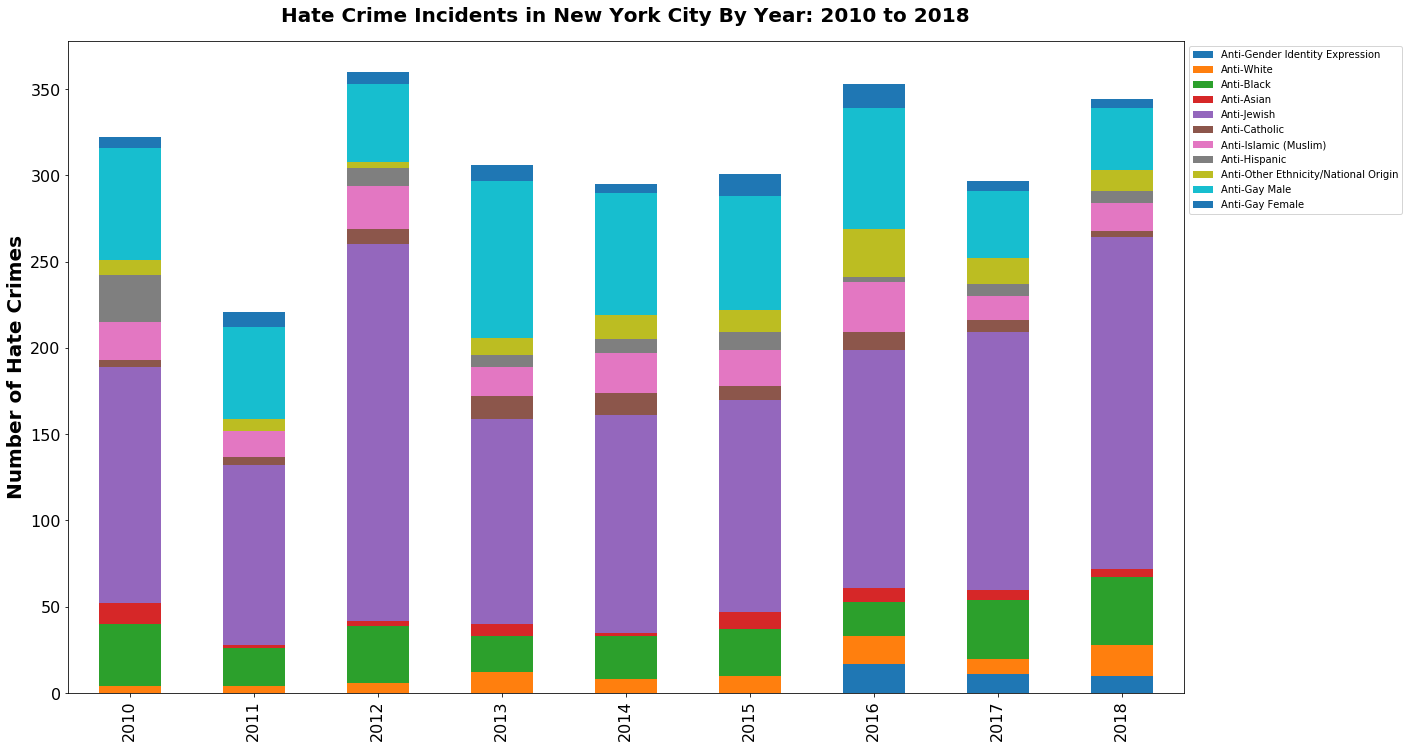

In [1154]:
#Stacked bar plot

nyc_hate_by_year.plot(kind = 'bar',stacked=True,figsize=(20,12)).legend(bbox_to_anchor=(1,1))
plt.title("Hate Crime Incidents in New York City By Year: 2010 to 2018", fontsize = 20, y = 1.02, fontweight='bold')
plt.ylabel("Number of Hate Crimes", fontsize = 20, fontweight='bold')
plt.xlabel("")
plt.tick_params(labelsize=16)

### Interpreting the yearly data

The graphs above show that the largest number of hate crime incidents in New York City from 2010 to 2018 have been Anti-Jewish followed by Anti-Gay (Male). The graph also shows that while the level of Anti-Gay (Male) incidents has been decreasing, Anti-Jewish incidents have been increasing. 

### Further analysis

Are there certain parts of the city where hate crimes are more prevalent? If so, what is the nature of those crimes? To help answer this question, the incidents from 2018 across the five boroughs will be analyzed since that is the most recent data available

### A look at the hate crimes in 2018 across the five boroughs of New York City...

In [1155]:
# Display the number of incidents for the last year of available data (2018) by New York City borough

nyc_hate_2018 = nyc_all_hate[nyc_all_hate['Year']== '2018']
nyc_hate_2018_total = nyc_hate_2018.groupby('County').sum()
nyc_hate_2018_total

,Anti-Gender Identity Expression,Anti-White,Anti-Black,Anti-Asian,Anti-Jewish,Anti-Catholic,Anti-Islamic (Muslim),Anti-Hispanic,Anti-Other Ethnicity/National Origin,Anti-Gay Male,Anti-Gay Female
County,,,,,,,,,,,
Bronx,0.0,2.0,3.0,0.0,10.0,0.0,2.0,1.0,1.0,1.0,2.0
Kings,2.0,6.0,12.0,2.0,75.0,1.0,5.0,0.0,2.0,17.0,1.0
New York,5.0,4.0,16.0,2.0,78.0,0.0,7.0,5.0,7.0,14.0,0.0
Queens,3.0,1.0,6.0,1.0,23.0,3.0,2.0,1.0,1.0,4.0,2.0
Richmond,0.0,5.0,2.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0


### A view of the 2018 borough by borough hate crime data in graphical form...

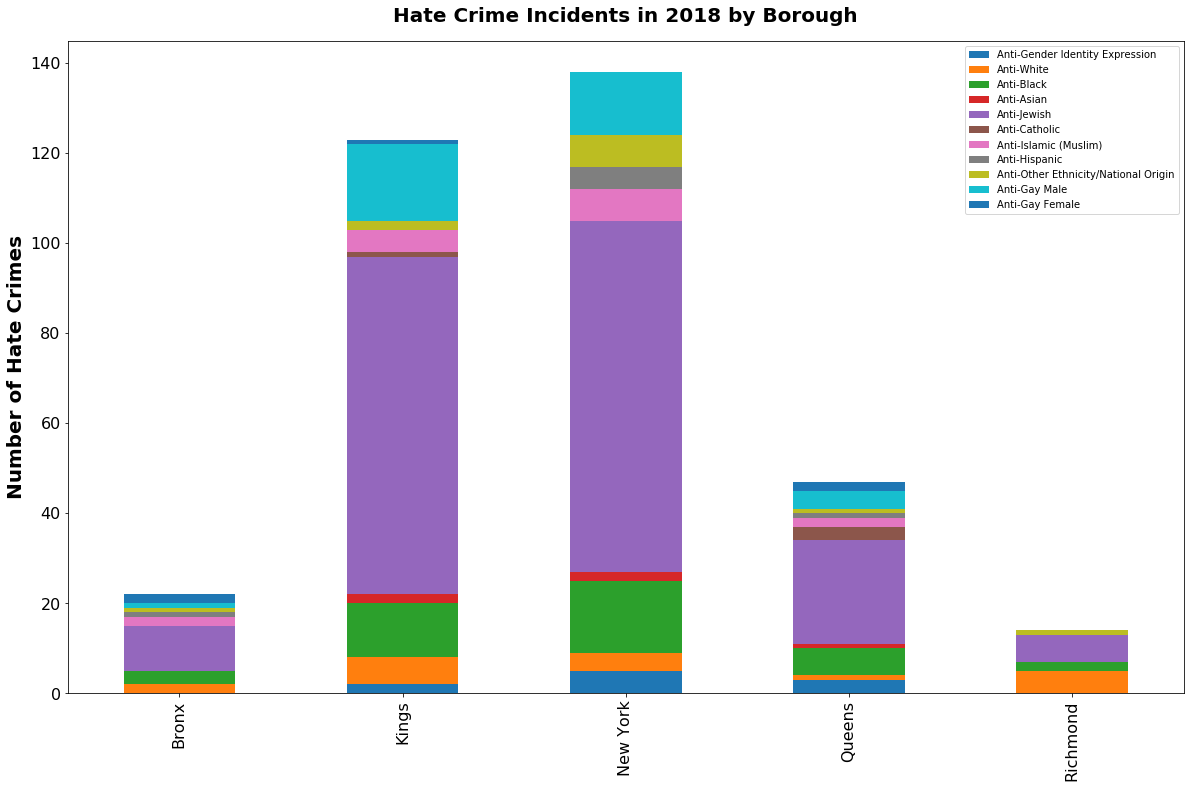

In [1156]:
#Stacked

nyc_hate_2018_total.plot(kind = 'bar',stacked=True,figsize=(20,12)).legend(bbox_to_anchor=(1,1))
plt.title("Hate Crime Incidents in 2018 by Borough", fontsize = 20, y = 1.02, fontweight='bold')
plt.ylabel("Number of Hate Crimes", fontsize = 20, fontweight='bold')
plt.xlabel("")
plt.tick_params(labelsize=16)

### Interpreting the borough by borough graph

The graph above shows that in 2018, the number of hate crime incidents that occurred in Manhattan (New York) and Brooklyn (Kings)far outnumbered the number of incidents in the other parts of the city.

Why the difference? Do Manhattan and Brooklyn have larger populations and therefore a greater chance for incidents to occur? Further analysis into the demographics is required.

### Basic demographics data across the five boroughs of New York City

The demographics data were pulled from Wikipedia and comes from US Census and The Association of Religion Archives (ARDA)

In [1157]:
#Scrape table data from wikipedia and convert into a dataframe

link = "https://en.wikipedia.org/wiki/Demographics_of_New_York_City"

tables = pd.read_html(link)

#Clean up the dataframe
nyc_demographics1 = pd.DataFrame(tables[0][0:5])
nyc_demographics1 = nyc_demographics.iloc[:,0:3]
nyc_demographics1.columns=['Borough','County','Population Estimate (2019)']
nyc_demographics1

,Borough,County,Population Estimate (2019)
0,The Bronx,Bronx,1418207
1,Brooklyn,Kings,2559903
2,Manhattan,New York,1628706
3,Queens,Queens,2253858
4,Staten Island,Richmond,476143


In [1158]:
#Pull in a new table from the wikipedia page showing more demographic data and convert that into a dataframe

#Clean up the dataframe
nyc_demographics2 = pd.DataFrame(tables[5])
nyc_demographics2 = nyc_demographics2.loc[1:8]
nyc_demographics2

,Jurisdiction,Population2000census,%white,%blackorAfricanAmerican,%Asian,%Other,%mixedrace,%Hispanic/Latinoof anyrace,Unnamed: 8,%Catholic,% notaffiliated,%Jewish,%Protestant,Estimateof % notreporting
1,Brooklyn,2465326,41.2,36.4,7.5,10.6,4.3,19.8,NaN,37,4,15,8,33
2,Queens,2229379,44.1,20.0,17.6,12.3,6.1,25.0,NaN,29,37,11,5,15
3,Manhattan,1537195,54.4,17.4,9.4,14.7,4.1,27.2,NaN,37,11,20,9,19
4,Bronx,1332650,29.9,35.6,3.0,25.7,5.8,48.4,NaN,44,14,6,5,29
5,Staten Island,443728,77.6,9.7,5.7,4.3,2.7,12.1,NaN,60,11,8,5,14
6,NYC Total,8008278,44.7,26.6,9.8,14.0,4.9,27.0,NaN,37,17,13,6,24
7,NY State,18976457,67.9,15.9,5.5,7.5,3.1,15.1,NaN,42,20,9,10,16
8,USA,281421906,75.1,12.3,3.6,6.5,2.4,12.5,NaN,22,37,2,23,12


#### Further interpretation of the borough by borough hate crime incident graph after reviewing borough level demographics

The graph titled "Hate Crime Incidents in 2018 by Borough" shows that the largest number of hate crimes occurred in Manhattan and Brooklyn. Are the populations levels in Manhattan and Brooklyn larger than the other parts of the city and therefore more likely to experience hate crime incidents? According to the demographics data, Brooklyn and its neighbor, Queens, have comparable populations. So why is there such a large difference in the number of hate crimes? According to the data, the largest number of hate crimes in New York City are directed at its Jewish population and according to the table above, Manhattan (20%) and Brooklyn (15%) have the highest Jewish populations. The data, however, does not explain *why* there are hate crimes against Jews in particular (or any other population).

In [1159]:
#Add the latitude and longitude coordinates to the 2018 dataframe
#Latitude and ongitude data pulled from Google

latitudes = ['40.8448','40.6782','40.7831','40.7282','40.5795']
longitudes = ['-73.8648','-73.9442','-73.9712','-73.7949','-74.1502']

nyc_hate_2018_total['Lat'] = latitudes
nyc_hate_2018_total['Lon'] = longitudes

#add a Totals column
nyc_hate_2018_total['Total'] = nyc_hate_2018_total.sum(axis=1)

nyc_hate_2018_total

,Anti-Gender Identity Expression,Anti-White,Anti-Black,Anti-Asian,Anti-Jewish,Anti-Catholic,Anti-Islamic (Muslim),Anti-Hispanic,Anti-Other Ethnicity/National Origin,Anti-Gay Male,Anti-Gay Female,Lat,Lon,Total
County,,,,,,,,,,,,,,
Bronx,0.0,2.0,3.0,0.0,10.0,0.0,2.0,1.0,1.0,1.0,2.0,40.8448,-73.8648,22.0
Kings,2.0,6.0,12.0,2.0,75.0,1.0,5.0,0.0,2.0,17.0,1.0,40.6782,-73.9442,123.0
New York,5.0,4.0,16.0,2.0,78.0,0.0,7.0,5.0,7.0,14.0,0.0,40.7831,-73.9712,138.0
Queens,3.0,1.0,6.0,1.0,23.0,3.0,2.0,1.0,1.0,4.0,2.0,40.7282,-73.7949,47.0
Richmond,0.0,5.0,2.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,40.5795,-74.1502,14.0


### The map below shows the total number hate crime incidents across the five boroughs of NYC in 2018

#### Click on the marker to see the total incidents for that borough

In [1160]:
NYC_lon = '-74.0060'
NYC_lat = '40.7127'

NYC_map = folium.Map(location=[NYC_lat, NYC_lon], zoom_start=11)
#NYC_map

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(nyc_hate_2018_total.Lat, nyc_hate_2018_total.Lon):
    incidents.add_child(folium.CircleMarker([lat, lng],radius=10,color='blue',fill=True,fill_color='red',fill_opacity=10))

# add pop-up text showing level of anti-jewish incidents to each marker on the map
labels = list(nyc_hate_2018_total['Total'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(NYC_map)    

# add incidents to map
NYC_map.add_child(incidents)

# Conclusion

New York City is one of the most diverse and cosmopolitan cities in the world so the number of hate crimes committed from 2010 to 2018 might seem a bit surprising at first glance, especially the number of hate crimes committed against Jews since, outside of Israel, New York City has the largest Jewish population in the world.  

### Additional Perspective

In addition to being incredibly diverse, New York City is also one of the most populated cities in the word with an estimated population of 8.3 million people. In a city this big and diverse, incidents are bound to occur. If we look at the overall hate crime incidents committed in 2018 vs. the estimated 2019 population levels and assume that the number of hate crime incidents remains similar, the hate crime levels do not appear as large. This is not a reason to be complacent however. Every effort should be made to eliminate hate crimes. Additionally, by analyzing hate crime data, we can spot and try to address disturbing trends before any group becomes marginalized. 


|Borough|2019 Population est.|2018 Incidents| Ratio of Incidents vs. Population |
|-------|--------------------|--------------|----------|
|Manhattan|1628706|138|**.008%**|
|Staten Island|476143|14|**.002%**|
|Queens|2253858|47|**.002%**|
|Brooklyn|2559903|123|**.004%**|
|The Bronx|1418207|22|**.001%**|

### How can we reduce the number of Hate Crimes committed?

This is a tough question. Hatred towards others has plagued humanity from time immemorial. New York City's relatively low level of hate crime incidents compared to its population seems to provide a clue however. It seems that by increasing diversity and surrounding ones-self with people who might be different, tolerance and understanding increases and hatred towards others decreases. 




#### Freedom of Speech vs. Hate Speech in the U.S. 

The following is an excerpt from the NYPD Hate Crimes/Bias Incidents Website:

**Freedom of Speech vs. Hate Crime**

> Freedom of speech is protected by our Constitution. Everyone has the right to express their likes, dislikes and opinions, no matter how offensive these expressions may be to others. Ultimately, offensive or hateful speech is still just speech and is protected.

>A hate crime is a criminal act that is motivated in whole or substantial part by the perceived identify of the victim. For example, when a person calls another person an insulting name, it is just a name and not a crime, even if the name is hateful and offensive. This kind of name calling is generally protected as free speech.

>In contrast, if someone calls a person a hateful name because of their identity alone and also assaults them, the assault is a crime, and the motivation makes the act a hate crime as well. The hate crime designation can also apply to other crimes, such as criminal mischief and graffiti, like painting racial slurs or swastikas on public or private property or the desecration of cemeteries associated with particular religious or racial groups. Free speech protections end with the commission of a criminal act, and hateful speech or writing in conjunction with a crime is a hate crime.

*Whether or not Freedom of Speech should be limited in an effort to eliminate / reduce hate crimes is beyond the scope of this analysis. The reader can decide for themselves what they believe is right.*


### Resources

New York State Hate Crime Data: 
https://data.ny.gov/Public-Safety/Hate-Crimes-by-County-and-Bias-Type-Beginning-2010/6xda-q7ev

New York Police Department (NYPD) Data: 
https://www1.nyc.gov/site/nypd/services/law-enforcement/hate-crimes.page

New York State Anti-Hate Crime Resource Guide: 
https://www.ny.gov/we-are-all-immigrants/new-york-state-anti-hate-crime-resource-guide

New York City Demographics Data from Wikipedia: 
https://en.wikipedia.org/wiki/Demographics_of_New_York_City#cite_note-64

Department of Justice (DOJ): Preventing Hate Crimes in Your Community:
https://www.justice.gov/hatecrimes/preventing-hate-crimes-your-community

American Psychological Association
https://www.apa.org/advocacy/interpersonal-violence/hate-crimes